# Importing Libraries/Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ct_2025_deliveries.csv')
df.head()

,match_id,season,phase,match_no,date,venue,batting_team,bowling_team,innings,over,...,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,202501,2025,Group Stage,1,"Feb 19, 2025","National Stadium, Karachi",NZ,PAK,1.0,0.1,...,Shaheen Afridi,0,0,0,0,0,0,NaN,NaN,NaN
1,202501,2025,Group Stage,1,"Feb 19, 2025","National Stadium, Karachi",NZ,PAK,1.0,0.2,...,Shaheen Afridi,3,0,0,0,0,0,NaN,NaN,NaN
2,202501,2025,Group Stage,1,"Feb 19, 2025","National Stadium, Karachi",NZ,PAK,1.0,0.3,...,Shaheen Afridi,0,0,0,0,0,0,NaN,NaN,NaN
3,202501,2025,Group Stage,1,"Feb 19, 2025","National Stadium, Karachi",NZ,PAK,1.0,0.4,...,Shaheen Afridi,0,0,0,0,0,0,NaN,NaN,NaN
4,202501,2025,Group Stage,1,"Feb 19, 2025","National Stadium, Karachi",NZ,PAK,1.0,0.5,...,Shaheen Afridi,0,0,0,0,0,0,NaN,NaN,NaN


# 1. Understanding the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          7352 non-null   int64  
 1   season            7352 non-null   int64  
 2   phase             7352 non-null   object 
 3   match_no          7352 non-null   int64  
 4   date              7352 non-null   object 
 5   venue             7352 non-null   object 
 6   batting_team      7352 non-null   object 
 7   bowling_team      7352 non-null   object 
 8   innings           7352 non-null   float64
 9   over              7352 non-null   float64
 10  striker           7352 non-null   object 
 11  bowler            7352 non-null   object 
 12  runs_of_bat       7352 non-null   int64  
 13  extras            7352 non-null   int64  
 14  wide              7352 non-null   int64  
 15  legbyes           7352 non-null   int64  
 16  byes              7352 non-null   int64  


In [4]:
df.shape

(7352, 21)

In [5]:
df.columns

Index(['match_id', 'season', 'phase', 'match_no', 'date', 'venue',
       'batting_team', 'bowling_team', 'innings', 'over', 'striker', 'bowler',
       'runs_of_bat', 'extras', 'wide', 'legbyes', 'byes', 'noballs',
       'wicket_type', 'player_dismissed', 'fielder'],
      dtype='object')

In [8]:
df.duplicated().sum()

np.int64(0)

# Match Level Analysis

**Total Runs Per Match**

In [9]:
# Total runs by each teams/match

match_runs = df.groupby('match_no')[['runs_of_bat','extras']].sum()
match_runs['Total Runs'] = match_runs['runs_of_bat'] + match_runs['extras']

print('Total runs scored in each match by both the teams')
print(match_runs)

Total runs scored in each match by both the teams
          runs_of_bat  extras  Total Runs
match_no                                 
1                 562      18         580
2                 447      11         458
3                 501      22         523
4                 670      37         707
5                 457      26         483
6                 445      31         476
8                 619      23         642
10                334      48         382
11                331      28         359
12                433      21         454
13                521      10         531
14                656      18         674
15                481      24         505


In [10]:
# Min and Max runs in match

min_id = match_runs['Total Runs'].idxmin()
max_id = match_runs['Total Runs'].idxmax()

min_runs = match_runs['Total Runs'].min()
max_runs = match_runs['Total Runs'].max()

print(f"Minimum runs:{min_runs} in match no:{min_id}")
print(f"Maximum runs:{max_runs} in match no:{max_id}")

Minimum runs:359 in match no:11
Maximum runs:707 in match no:4


**Venue Impact on Score**

In [11]:
# Average score by venue

venue_runs = df.groupby(['venue','match_id'])['runs_of_bat'].sum().reset_index()
venue_avg_runs = venue_runs.groupby('venue')['runs_of_bat'].mean().reset_index()
venue_avg_runs.columns = ["Venue", "Average Runs in each Venue"]

print(venue_avg_runs)

                                        Venue  Average Runs in each Venue
0  Dubai International Cricket Stadium, Dubai                  467.800000
1                     Gaddafi Stadium, Lahore                  569.750000
2                   National Stadium, Karachi                  464.666667
3      Rawalpindi Cricket Stadium, Rawalpindi                  445.000000


In [12]:
# Highest/ Lowest Scoring Ground

match_venue = df.groupby(['venue','match_no'])[['runs_of_bat']].sum().reset_index()

print('Venue with highest score:')
print(match_venue.max())
print()
print('Venue with lowest score:')
print(match_venue.min())

Venue with highest score:
venue          Rawalpindi Cricket Stadium, Rawalpindi
match_no                                           15
runs_of_bat                                       670
dtype: object

Venue with lowest score:
venue          Dubai International Cricket Stadium, Dubai
match_no                                                1
runs_of_bat                                           331
dtype: object


# Team Performance Analysis

**Team Wise Batting Performance**

In [18]:
# Total runs by each team

team_runs = df.groupby('batting_team')['runs_of_bat'].sum()
print('Total runs made by each taem extras,wides,byes not considered')
print(team_runs)

Total runs made by each taem extras,wides,byes not considered
batting_team
AFG     749
AUS     697
BAN     430
ENG     794
IND    1210
NZ     1321
PAK     479
RSA     777
Name: runs_of_bat, dtype: int64


In [19]:
# Lowest/ Highest scoring taem

low_score_team = team_runs.idxmin()
low_team_score = team_runs.min()
print('Lowest scoring team:', low_score_team, 'with total score:',low_team_score)

high_score_team = team_runs.idxmax()
high_team_score = team_runs.max()
print('Highest scoring team:', high_score_team, 'with total score:',high_team_score)

Lowest scoring team: BAN with total score: 430
Highest scoring team: NZ with total score: 1321


**Team Wise Bowling Performance**

In [20]:
# Wicket taken by each team

wickets = df[df['wicket_type'].notna()]
team_wickets = wickets.groupby('bowling_team')['wicket_type'].count().reset_index()
team_wickets.columns = ['Team', 'Total Wickets']
print('Total wickets taken by each team')
print(team_wickets)

Total wickets taken by each team
  Team  Total Wickets
0  AFG             17
1  AUS             24
2  BAN              9
3  ENG             15
4  IND             47
5   NZ             43
6  PAK              9
7  RSA             26


**Impact of Powerplay & Death Overs**

In [21]:
# Average runs per over in different phases

powerplay_runs = df[(df['over'] <= 6.0)]['runs_of_bat'].sum()
middle_over_runs = df[(df['over'] >= 7.0) & (df['over'] <= 15.0) ]['runs_of_bat'].sum()
death_over_runs = df[(df['over'] >= 16.0) & (df['over'] <= 20.0) ]['runs_of_bat'].sum()

powerplay_overs = df[df['over'] < 6.0]['over'].nunique()
middle_overs = df[ (df['over'] >= 7.0) & (df['over'] <= 15.0) ]['over'].nunique()
death_overs = df[ (df['over'] >= 16.0) & (df['over'] <= 20.0) ]['over'].nunique()

avg_runs_pp = powerplay_runs / powerplay_overs
avg_runs_middle = middle_over_runs / middle_overs
avg_runs_death = death_over_runs / death_overs

print('Average runs in powerplay(0-6):',avg_runs_pp)
print('Average runs in middle overs(7-15):',avg_runs_middle)
print('Average runs in death overs(16-20):',avg_runs_death)

Average runs in powerplay(0-6): 21.083333333333332
Average runs in middle overs(7-15): 20.270833333333332
Average runs in death overs(16-20): 18.708333333333332


# Player Performance Analysis

**Top Batters**

In [22]:
# Most runs scored by a player

top_batsmans = df.groupby('striker', as_index=False)['runs_of_bat'].sum()
top_batsmans.columns = ['Batsman', 'Runs']
top_batsmans = top_batsmans.sort_values(by='Runs', ascending=False).head(10)

print('Top scorer')
print(top_batsmans)

Top scorer
           Batsman  Runs
64        Ravindra   263
80    Shreyas Iyer   243
11         Duckett   227
69            Root   225
31           Kohli   218
20  Ibrahim Zadran   216
34          Latham   205
92      Williamson   200
95  van der Dussen   193
81    Shubman Gill   188


In [32]:
# Highest individual score in a match

individual_score = df.groupby(['match_id','striker','bowling_team'],as_index=False)['runs_of_bat'].sum()
highest_score = individual_score.sort_values(by='runs_of_bat' ,ascending=False).iloc[0]
highest_score.columns = ['Match_id','Batsman','Against','Runs']

print(f"Highest Individual Score: {highest_score['runs_of_bat']} by {highest_score['striker']}, Against: {highest_score['bowling_team']} ")

Highest Individual Score: 177 by Ibrahim Zadran, Against: ENG 


In [33]:
# Strike Rates

batsman_runs = df.groupby('striker')['runs_of_bat'].sum()
no_of_balls = df.groupby('striker')['over'].count()

strike_rate = (batsman_runs / no_of_balls)*100
strike_rate = strike_rate.reset_index()
strike_rate.columns = ['Batsman', 'Strike Rate']
strike_rate =strike_rate.sort_values(by='Strike Rate', ascending=False).head(20)

print(strike_rate)

              Batsman  Strike Rate
26           Jamieson   225.000000
43            Maxwell   195.000000
18         Haris Rauf   158.823529
54       Nathan Ellis   142.857143
46             Miller   137.500000
28        Josh Inglis   132.323232
63        Rashid Khan   122.580645
19               Head   122.352941
40            Markram   122.058824
29           Khushdil   118.888889
70        Salman Agha   117.307692
66     Rishad Hossain   115.789474
45  Michael Bracewell   115.492958
58          Phil Salt   115.384615
6        Brydon Carse   114.285714
51               Nabi   111.363636
59           Phillips   109.937888
27       Jofra Archer   109.090909
8               Carey   107.438017
11            Duckett   105.581395


**Top Bowlers**

In [34]:
# Highest Wicket Taker

bowler_wicket = df.groupby('bowler',as_index=False)['wicket_type'].count()
highest_wicket_taker = bowler_wicket.sort_values(by='wicket_type' ,ascending=False).head(10)
print('Highest wicket taker:')
print(highest_wicket_taker)

Highest wicket taker:
                bowler  wicket_type
25          Matt Henry           11
50               Shami           10
47             Santner            9
18       Kuldeep Yadav            8
29   Michael Bracewell            8
6            Dwarshuis            7
56  Varun Chakravarthy            7
40              Rabada            7
3           Azmatullah            7
9        Hardik Pandya            6


In [35]:
# Bowlers with best economy rate

runs = df.groupby('bowler')['runs_of_bat'].sum()
ball = df.groupby('bowler')['over'].count()

economy = (runs / ball) *6
economy.columns = ['Bowler','Economy']
economy = economy.sort_values().head(10)
print(economy)

bowler
Matthew Short          3.306122
Varun Chakaravarthy    3.619048
Harshit Rana           3.663158
Abrar Ahmed            3.669421
Michael Bracewell      3.933110
Taskin Ahmed           4.000000
Mulder                 4.267606
Axar                   4.317343
Jadeja                 4.357143
Varun Chakravarthy     4.377049
dtype: float64


# Visualization

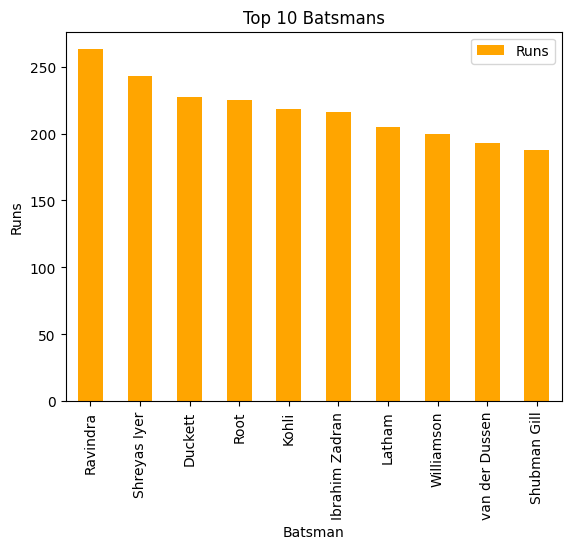

In [36]:
# Top 10 Batsman

top_batsmans.plot(kind='bar', x='Batsman',y='Runs', color='orange')
plt.title('Top 10 Batsmans')
plt.xlabel('Batsman')
plt.ylabel('Runs')
plt.show()

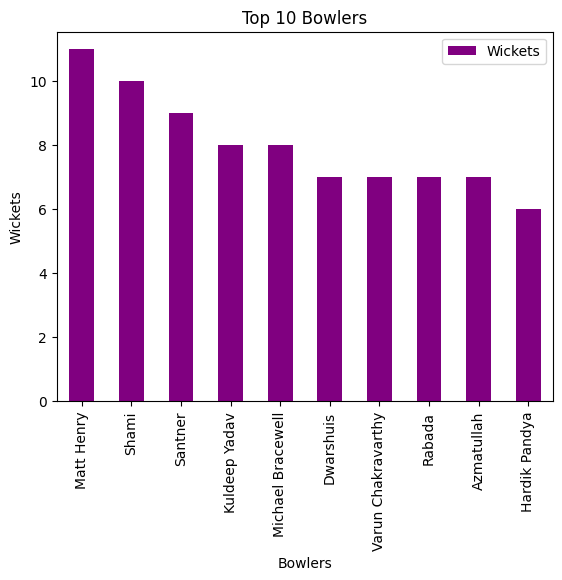

In [37]:
# Top 10 Bowlers
highest_wicket_taker.plot(kind='bar', x='bowler', y='wicket_type', label='Wickets',color='purple')
plt.title('Top 10 Bowlers')
plt.xlabel('Bowlers')
plt.ylabel('Wickets')
plt.show()

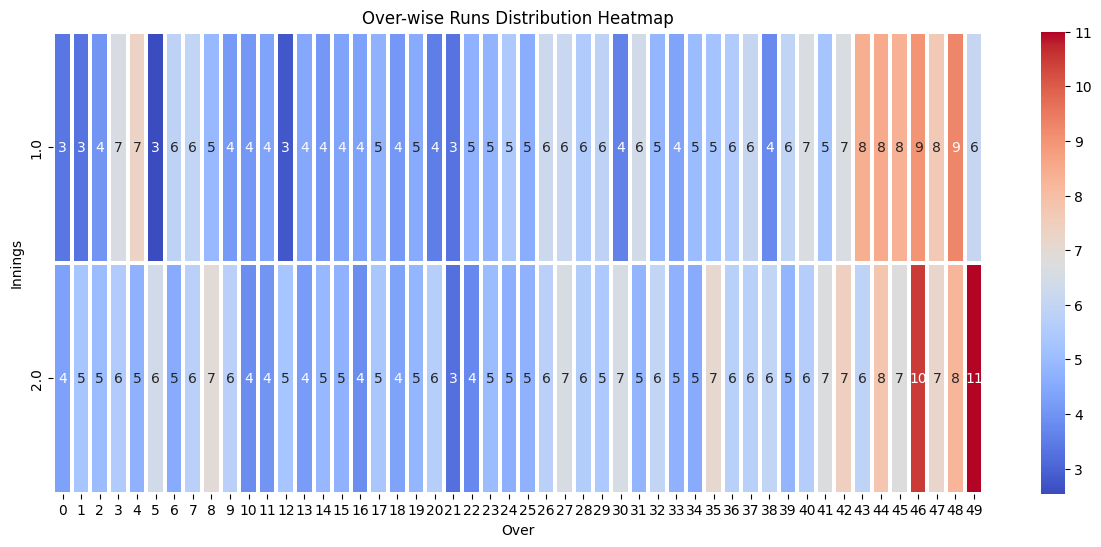

In [38]:
# Heat-map for over wise runs distribution

plt.figure(figsize=(15, 6))

df['over'] = df['over'].astype(int)
over_wise_runs = df.groupby(['match_id','over','innings'])['runs_of_bat'].sum().reset_index()
pivot_table = over_wise_runs.pivot_table(index='innings', columns='over' ,values='runs_of_bat')
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".0f", linewidths=1.5)
plt.xlabel("Over")
plt.ylabel("Innings")
plt.title("Over-wise Runs Distribution Heatmap")
plt.show()

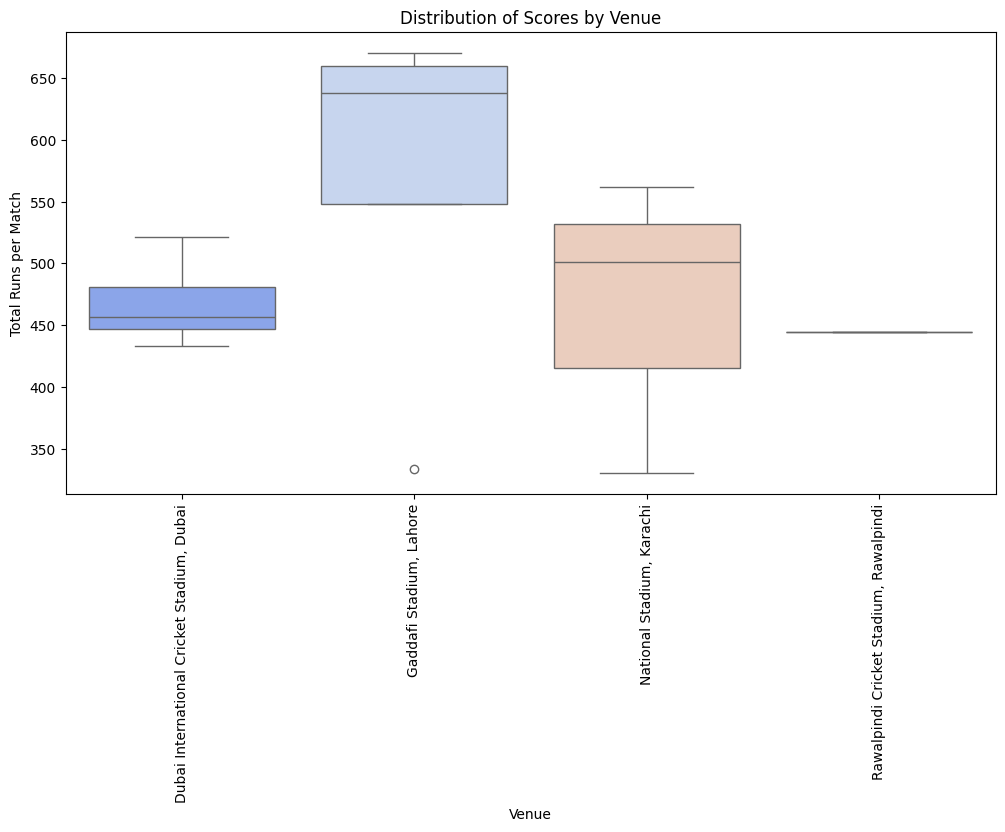

In [39]:
# Box plot for Venue wise runs

plt.figure(figsize=(12, 6))
sns.boxplot(x="venue", y="runs_of_bat", data=venue_runs, hue="venue", palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Venue")
plt.ylabel("Total Runs per Match")
plt.title("Distribution of Scores by Venue")
plt.show()

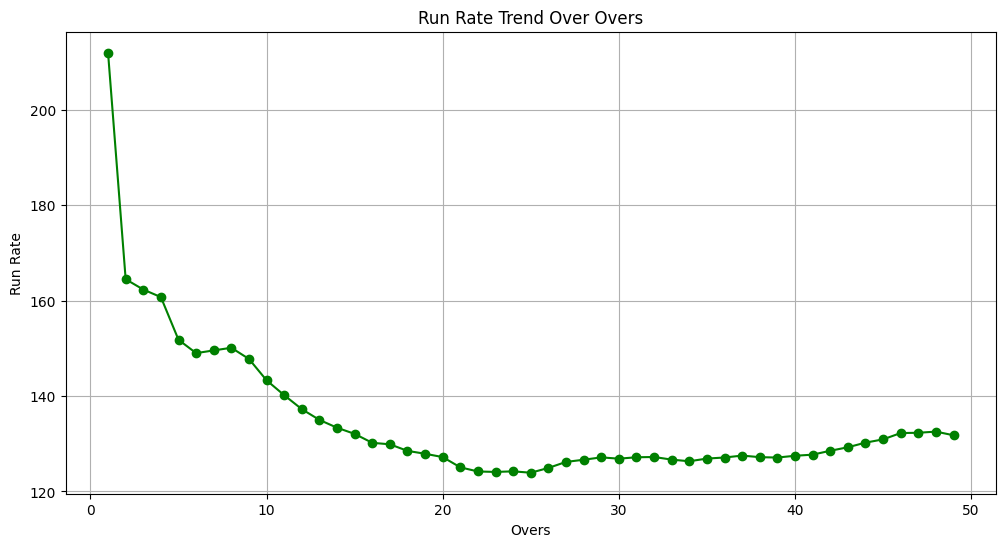

In [40]:
# Line graphs for trends in run rate over overs.

overs_runs = df.groupby('over')['runs_of_bat'].sum()
cumulative_runs = overs_runs.cumsum()
overs = overs_runs.index
run_rate = cumulative_runs / overs

# Plotting the graph
plt.figure(figsize=(12, 6))
plt.plot(overs, run_rate, marker='o', linestyle='-', color='g')
plt.title('Run Rate Trend Over Overs')
plt.xlabel('Overs')
plt.ylabel('Run Rate')
plt.grid(True)
plt.show()